In [2]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

In [3]:
#reading the data
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(path)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#statistical summary of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#declaring ecplanatory and response variable
x = data[["Hours"]]
y = data[["Scores"]]

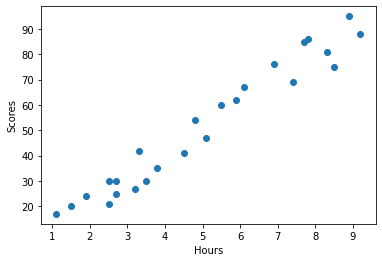

In [6]:
#ploting the scatter plot
plt.scatter(x,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [7]:
#from the graph above we can clearly see that there is positive linear correlation between the two variables

In [8]:
#importing library for regression
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
#building and training the model
x = sm.add_constant(x)
model = sm.OLS(y, x)
slr = model.fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           9.13e-17
Time:                        11:25:53   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

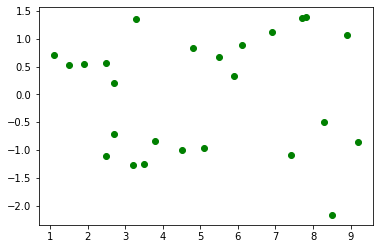

In [10]:
#residual plot
inf = slr.get_influence()
resid_slr = inf.resid_studentized_external
plt.scatter(data.Hours, resid_slr, color = "green")

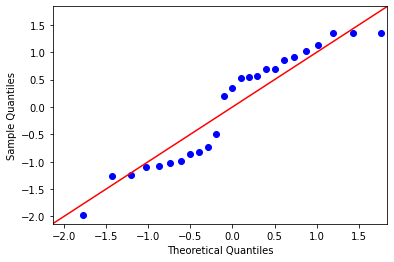

In [11]:
#plot normality plot
from scipy import stats
res = slr.resid #residuals
probplot = sm.ProbPlot(res, stats.norm, fit = True)
probplot.qqplot(line = '45')
plt.show()

In [31]:
# What will be predicted score if a student studies for 9.25 hrs/ day
hours = pd.DataFrame({'constant' : [1], 'Hours' : [9.25]})
slr.predict(hours)

0    92.909855
dtype: float64

In [15]:
#evaluating performance
from sklearn.metrics import mean_squared_error
from math import sqrt


In [25]:
pred = slr.predict(x)
print("root mean square error is", np.sqrt(mean_squared_error(data['Scores'].ravel(),pred)))

root mean square error is 5.374265578592619
